In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (1).csv


In [39]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [40]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [42]:
df.drop('Serial No.',axis=1,inplace = True) #to remove the serial no. column and axis = 1 remove all the rows of that column and inplace = True will make sure all changes will be made in the old df

In [43]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [45]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


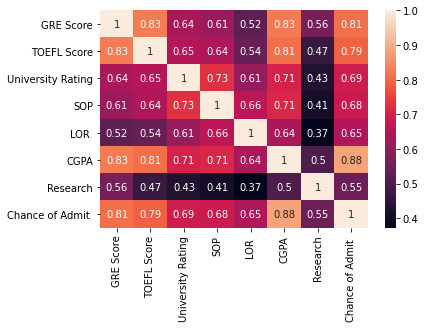

In [46]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


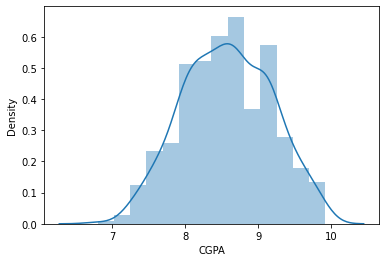

In [47]:
sns.distplot(df['CGPA'])

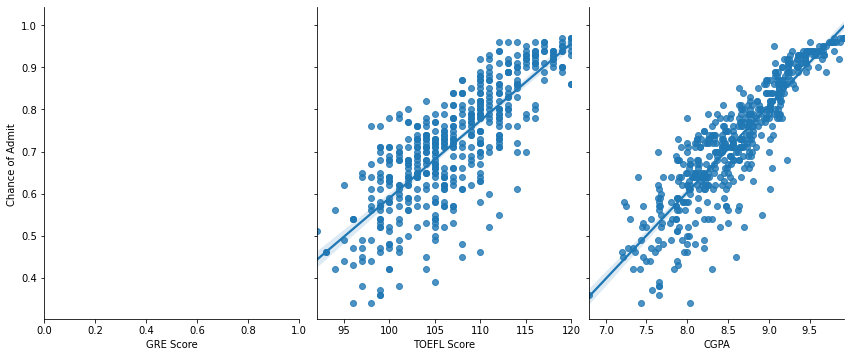

In [50]:
sns.pairplot(df,x_vars=['GRE Score','TOEFL Score','CGPA'],y_vars='Chance of Admit ',height=5,aspect=0.8,kind='reg')

In [51]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [84]:
x = df[['GRE Score', 'TOEFL Score','CGPA']]
x.shape

(500, 3)

In [86]:
y = df[['Chance of Admit ']]
y.shape

(500, 1)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [89]:
x_train

,GRE Score,TOEFL Score,CGPA
107,338,117,9.46
336,319,110,8.79
71,336,112,9.76
474,308,105,7.95
6,321,109,8.20
...,...,...,...
323,305,102,8.18
192,322,114,8.94
117,290,104,7.46
47,339,119,9.70


In [92]:
linreg = LinearRegression() #creating the model
linreg.fit(x_train,y_train) #training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_pred = linreg.predict(x_test)

In [94]:
y_pred[:7]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329]])

In [95]:
y_test.head(7)

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
15,0.54
316,0.54


In [97]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

0.04688621359385721
